IMPORTACION DE BASE DE DATOS

In [2]:
# Instalación básica
!pip install pandas numpy matplotlib seaborn

# Para bases de datos SQL
!pip install sqlalchemy pymysql psycopg2-binary

# Para Excel
!pip install openpyxl xlrd

# Para APIs
!pip install requests

# Para MongoDB 
!pip install pymongo

#### IMPORTAR BASE DE DATOS

In [3]:
import pandas as pd

# Cargar archivo CSV - asegúrate de que tenga extensión ".csv"
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SCIKIT LEARN\AccidentesElectricos_Limpio (1).csv")
df = df[df['TIPO_LESION'].notna()]
# Verificar importación
print("Datos importados:")
print(df.head())
print(f"Total registros: {len(df)}")


Datos importados:
   IDENTIFICADOR_EMPRESA                                          EMPRESA  \
0                  617.0    EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   
1                  617.0    EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   
2                 3370.0            EMPRESA DE ENERGIA DE CASANARE SA ESP   
3                23442.0  COMPAÑIA ENERGETICA DE OCCIDENTE S.A.S.  E.S.P.   
4                  617.0    EMPRESAS MUNICIPALES DE CARTAGO S.A.S. E.S.P.   

        FECHA  ANIO  TRIMESTRE   HORA    COD_DANE     DEPARTAMENTO  \
0  03/09/2011  2011          1  12:15  76147010.0  VALLE DEL CAUCA   
1  09/09/2010  2010          3  09:55  76147000.0  VALLE DEL CAUCA   
2  09/05/2015  2015          3  09:15  85263000.0         CASANARE   
3  11/27/2014  2014          4  11:40  19698020.0            CAUCA   
4  09/18/2014  2014          3  11:45  76147000.0  VALLE DEL CAUCA   

                MUNICIPIO CENTRO_POBLADO  ... TIPO_IDENTIFICACION  \
0                 CARTAGO    

IMPORTAR LIBRERIAS

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap

c:\Users\LENOVO\Desktop\SCIKIT LEARN\SCIKITLEARN\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Variables categóricas que vamos a codificar
cat_vars = ['VINCULADO_EMPRESA', 'TIPO_VINCULACION', 'GRADO_ESCOLARIDAD',
            'SECCION_EMPRESA', 'ORIGEN_ACCIDENTE', 'CAUSA_ACCIDENTE']

# Codificación con LabelEncoder
le_dict = {}
for var in cat_vars:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var].astype(str))
    le_dict[var] = le  # Guardamos para usar en despliegue

# Convertimos la variable objetivo a categorías
df['TIPO_LESION'] = df['TIPO_LESION'].astype('category')
df['y'] = df['TIPO_LESION'].cat.codes  # variable objetivo codificada

In [6]:
# Variables predictoras
X = df.drop(columns=['TIPO_LESION', 'y'])
y = df['y']

# División entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler




categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)





Escalado de variables numéricas (opcional)



In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Detectar columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Preprocesador: codificar las categóricas y escalar las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Aplicar transformación a ambas particiones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Detectar columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Crear el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [49]:
print("▶️ y_test:")
print(y_test.head())

print("\n▶️ y_pred:")
print(y_pred[:5])

print("\n▶️ Categorías en df['TIPO_LESION']:")
print(df['TIPO_LESION'].cat.categories)

print("\n▶️ Clases únicas en y_test:")
print(sorted(y_test.unique()))

▶️ y_test:
111    6
2      6
35     4
335    5
237    6
Name: y, dtype: int8

▶️ y_pred:
[6 6 6 6 6]

▶️ Categorías en df['TIPO_LESION']:
Index(['Conjuntivitis', 'Derivadas', 'Electrólisis', 'Fibrilación', 'Muerte',
       'Otra', 'Quemaduras', 'Tetanización', 'Traumatismos'],
      dtype='object')

▶️ Clases únicas en y_test:
[np.int8(0), np.int8(1), np.int8(3), np.int8(4), np.int8(5), np.int8(6), np.int8(7), np.int8(8)]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Códigos de las clases (0 a 8) y nombres correspondientes
labels = list(range(len(df['TIPO_LESION'].cat.categories)))
target_names = list(df['TIPO_LESION'].cat.categories)

# Reporte de clasificación
print(confusion_matrix(y_test, y_pred))
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

[[ 0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  8  0  0]
 [ 0  0  0  0 16  8  0  0]
 [ 0  0  0  0  1 51  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  2  9  0  2]]

📊 Reporte de Clasificación:
               precision    recall  f1-score   support

Conjuntivitis       0.00      0.00      0.00         1
    Derivadas       1.00      0.33      0.50         3
 Electrólisis       0.00      0.00      0.00         0
  Fibrilación       0.00      0.00      0.00         1
       Muerte       0.00      0.00      0.00         9
         Otra       0.80      0.67      0.73        24
   Quemaduras       0.63      0.98      0.77        52
 Tetanización       0.00      0.00      0.00         1
 Traumatismos       1.00      0.15      0.27        13

     accuracy                           0.67       104
    macro avg       0.38      0.24      0.25       104
 weighted avg       0.65      0.67      0.60       104

✅ Accuracy: 0.6730769230769231


In [54]:
# Asegúrate de separar variables categóricas y numéricas
X = df.drop('TIPO_LESION', axis=1)
y = df['TIPO_LESION'].cat.codes  # Si ya la tenías como categoría

# Convierte variables categóricas a dummies
X = pd.get_dummies(X)

# División
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Escalado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [59]:
import shap

# Crear el TreeExplainer con datos de fondo
explainer = shap.TreeExplainer(rf, X_train_scaled)

# Obtener los valores SHAP
shap_values = explainer.shap_values(X_test_scaled)

In [60]:
import shap
import sklearn
import platform

print("SHAP version:", shap.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Python version:", platform.python_version())

SHAP version: 0.47.2
Scikit-learn version: 1.6.1
Python version: 3.13.3


In [61]:
explainer = shap.Explainer(rf, X_train_scaled, algorithm="tree")


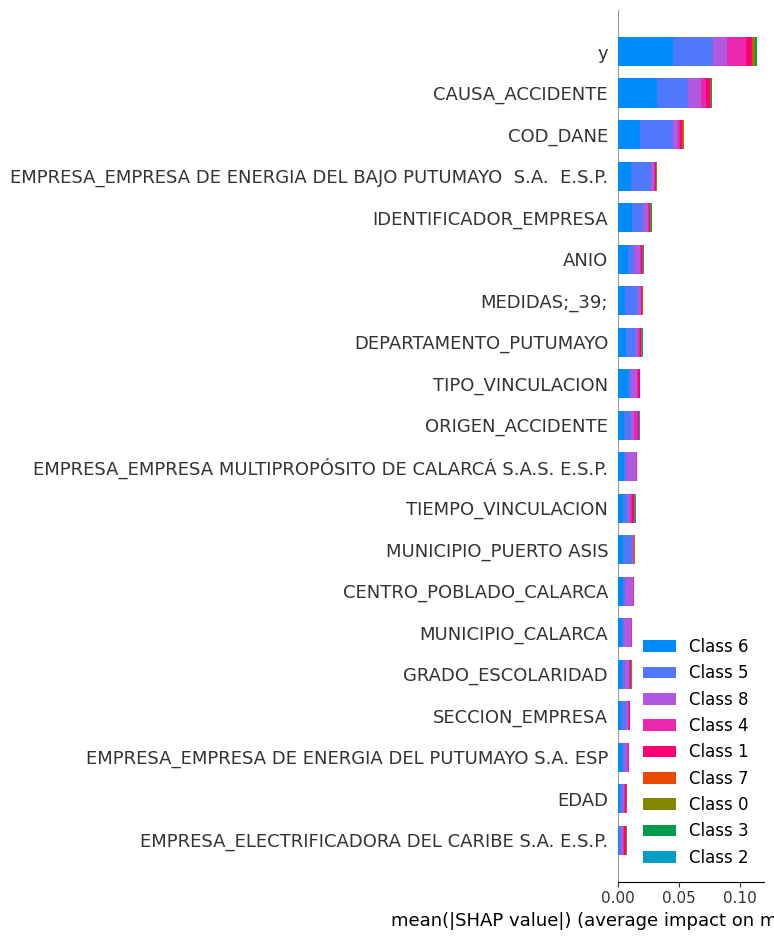

In [62]:
# Interpretabilidad con SHAP
explainer = shap.Explainer(rf, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Gráfico resumen
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)